## **BG Subtraction**

- Separate the building rooftops from the entire background and remove the building so that it can be used in the next step to annotate using the CVAT tool.

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import glob
import os

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_path_image = '/content/drive/MyDrive/airs-minisample/patch/'
train_path_label = '/content/drive/MyDrive/airs-minisample/patch/'

In [ ]:
image_numbers = [36, 84, 97, 173, 174, 196, 215, 216, 217, 259, 260, 282, 304, 389, 411, 445, 458, 490, 539, 540, 602, 683, 708, 784, 792, 937, 979, 995, 1043, 74, 168, 194, 273, 677, 503, 606, 53, 209, 372, 512, 822, 852, 1038]

- cv2.imread will convert image to numpy array

**IDEA**

- Draw bounding boxes in segmented image. ✅
- Store the bounded boxes result in a vector. ✅
- Fill the bounding box with a color (Color filling - so that the entire bounding box is filled with white color): named as seg_with_bounded_box. ✅
- Perform background subtraction: original aerial imagery - seg_with_bounded_box. ✅
- Crop regions based on the bounded box stored in step 2. ✅


-- For now try this: In case, resolution is not so good we can try zooming first and then cropping

### **Draw bounding boxes on the binary segmented mask & perform color filling**

- Convert the image to grayscale.
- Apply threshold.
- Get contours.
- Fill bounding box with color
- Store {x,y,w,h} in a vector of list

In [ ]:
def draw_bb_color_filling(img, img_mask):

  # convert to grayscale
  gray = cv2.cvtColor(img_mask, cv2.COLOR_BGR2GRAY)

  # threshold
  thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)[1]

  # get contours
  result = img_mask.copy()
  seg_with_bounded_box = img_mask.copy()
  contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  contours = contours[0] if len(contours) == 2 else contours[1]
  print("No of identified buildings: {0}".format(len(contours)))
  bb = []

  for cntr in contours:
      x,y,w,h = cv2.boundingRect(cntr)
      cv2.rectangle(result, (x, y), (x+w, y+h), (0, 0, 255), 2)
      cv2.rectangle(seg_with_bounded_box, (x, y), (x+w, y+h), (255, 255, 255), -1)
      bb.append([x,y,w,h])

  print(bb)   

  plt.imshow(seg_with_bounded_box)
  plt.title('Segmented mask with bounding box and color filling')
  plt.show()

  return bb, seg_with_bounded_box

### **Background Subtraction**


In [ ]:
# Post-process
def background_subtraction(img, seg_with_bounded_box):
  
  new_seg_image_gray = cv2.cvtColor(seg_with_bounded_box, cv2.COLOR_RGB2GRAY) # Convert the mask to grayscale
  img_np = np.asarray(img) # Convert the PIL image to a numpy array
  masked_out = cv2.bitwise_and(img_np, img_np, mask = new_seg_image_gray) # Blend the mask
  masked_out_new = np.where(masked_out != 0, masked_out, 255) # Remove the background
  
  plt.imshow(masked_out_new)
  plt.title('Masked-out Image')
  plt.show()
  
  return masked_out_new

### **Cropping & Saving Buidings**

In [ ]:
def crop_and_save(bb, masked_out_new, building_name):

  for i in range(len(bb)):
    x = bb[i][0]
    y = bb[i][1]
    w = bb[i][2]
    h = bb[i][3]
    # print('x, y, w, h: ', x,y,w,h)
    # try using Image.crop()
    # masked_out_new.crop((x,y,w,h))
    # cv2.imwrite('/content/drive/MyDrive/airs-minisample/crop-saved/'+str(i)+'.tif', masked_out_new.crop((x,y,w,h)))
    # print('/content/drive/MyDrive/airs-minisample/crop-saved/'+ building_name + '_' + str(i) + '.tif')
    cv2.imwrite('/content/drive/MyDrive/airs-minisample/crop-saved/'+ building_name + '_' + str(i) + '.tif', masked_out_new[y:y+h, x:x+w])
    # fig = plt.figure(figsize=(15,15))
    # fig.add_subplot(len(bb), 1, i+1)
    # plt.imshow(masked_out_new[y:y+h, x:x+w])
    # plt.plot()

Path names: /content/drive/MyDrive/airs-minisample/patch/christchurch_173.tif, /content/drive/MyDrive/airs-minisample/patch/christchurch_173_vis.tif
(10000, 10000, 3) (10000, 10000, 3) <class 'numpy.ndarray'>
No of identified buildings: 424
[[1381, 9965, 99, 35], [8421, 9952, 92, 48], [5161, 9843, 214, 157], [1317, 9839, 148, 133], [7933, 9757, 139, 101], [4123, 9756, 257, 175], [5121, 9561, 155, 130], [6239, 9510, 702, 305], [8082, 9503, 345, 221], [8725, 9295, 417, 647], [1651, 9282, 647, 718], [8308, 9068, 132, 189], [2105, 9037, 63, 72], [6349, 9026, 703, 237], [7056, 9011, 192, 159], [7077, 8907, 105, 113], [7168, 8904, 49, 48], [9296, 8891, 59, 73], [1995, 8872, 142, 143], [7216, 8866, 122, 160], [7388, 8835, 330, 540], [9218, 8732, 169, 86], [4005, 8721, 448, 626], [6715, 8672, 682, 316], [7436, 8604, 58, 89], [7687, 8567, 336, 300], [7480, 8537, 229, 254], [7982, 8477, 538, 358], [3082, 8468, 758, 1246], [2094, 8407, 1221, 1415], [7696, 8163, 62, 84], [8913, 7983, 452, 775], [7

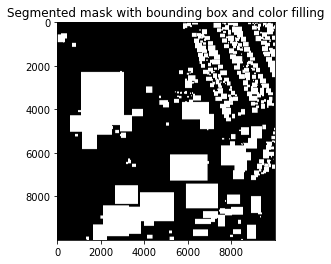

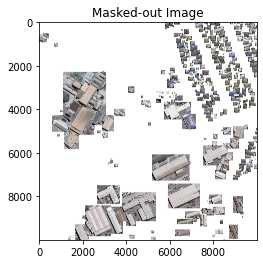

Path names: /content/drive/MyDrive/airs-minisample/patch/christchurch_174.tif, /content/drive/MyDrive/airs-minisample/patch/christchurch_174_vis.tif
(10000, 10000, 3) (10000, 10000, 3) <class 'numpy.ndarray'>
No of identified buildings: 66
[[6071, 6504, 3929, 3496], [5724, 5511, 340, 332], [5658, 5429, 187, 195], [7934, 4723, 141, 131], [7500, 4581, 569, 555], [7927, 4577, 146, 122], [5866, 4469, 2409, 2573], [8085, 4366, 1915, 2675], [8088, 4050, 625, 717], [2338, 4038, 624, 502], [7854, 3868, 658, 724], [9910, 3586, 90, 384], [4260, 3533, 1707, 1630], [2089, 3416, 455, 595], [3383, 3411, 1141, 1304], [9133, 3292, 747, 575], [6858, 3257, 1238, 1234], [8555, 3220, 543, 359], [2659, 2982, 649, 633], [2303, 2795, 181, 97], [3690, 2592, 321, 371], [2346, 2268, 540, 380], [6156, 2165, 265, 669], [6910, 2020, 62, 45], [3619, 2016, 445, 279], [4193, 1997, 163, 1028], [9339, 1980, 169, 227], [4372, 1976, 253, 951], [4640, 1958, 214, 952], [4874, 1942, 202, 953], [5114, 1926, 221, 946], [5374,

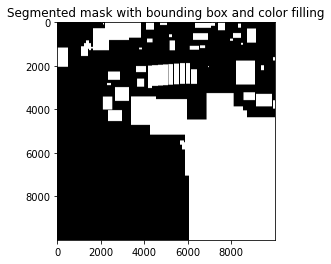

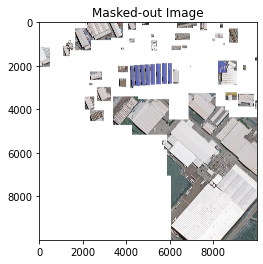

In [ ]:
# len(image_numbers)
for i in range(3,5,1):

  building_name ='christchurch_' + str(image_numbers[i])
  train_path_image_i = train_path_image + building_name + '.tif'
  train_path_label_i = train_path_image + building_name + '_vis.tif'
  print('Path names: {0}, {1}'.format(train_path_image_i, train_path_label_i))

  img = cv2.imread(train_path_image_i, cv2.IMREAD_COLOR)
  img_mask = cv2.imread(train_path_label_i, cv2.IMREAD_COLOR)
  print(img.shape, img_mask.shape, type(img_mask))

  bb, seg_with_bounded_box = draw_bb_color_filling(img, img_mask)
  masked_out_new = background_subtraction(img, seg_with_bounded_box)
  crop_and_save(bb, masked_out_new, building_name)

### **Zoom and then crop & save image**

**Zooming without loosing aspect ratio:** https://stackoverflow.com/questions/69050464/zoom-into-image-with-cv2

In [ ]:
def zoom_at(img, x, y, zoom):
    w, h = img.size
    zoom2 = zoom * 50
    img = img.crop((x - w / zoom2, y - h / zoom2, 
                    x + w / zoom2, y + h / zoom2))
    return img.resize((w, h), Image.LANCZOS)

In [ ]:
img_zoom = Image.open("/content/drive/MyDrive/airs-minisample/train/image/christchurch_10.tif")
for i in range(len(bb)):
  x = bb[i][0]
  y = bb[i][1]
  w = bb[i][2]
  h = bb[i][3]
  print('x, y, w, h: ', x,y,w,h)

  image_bb_zoomed = zoom_at(img_zoom, x+w//2, y+h//2, 1.5)
  image_bb_zoomed.save('/content/drive/MyDrive/airs-minisample/crop-saved/zoom-'+str(i)+'.tif')
  # cv2.imwrite('/content/drive/MyDrive/airs-minisample/crop-saved/zoom-'+str(i)+'.tif', image_bb_zoomed)